<a href="https://colab.research.google.com/github/ProfKaromo/2022-ModComNotebook_classBackup/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cohort Analysis**

We will use a dataset downloaded from the UCI Machine Learning Repository, which is a great source for different kinds of datasets. They are already labeled according to the area of machine learning which they can be used for:

supervised (regression/classification),
unsupervised (clustering).
You can find the dataset here. Alternatively, you can download the data directly from the Jupyter Notebook using the following line:

In [ ]:
import pandas as pd
df = pd.read_csv('https://modcom.co.ke/datasets/OnlineRetail.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


The dataset can be briefly described as: “This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.”

In [ ]:
import pandas as pd
df = pd.read_csv('https://modcom.co.ke/datasets/OnlineRetail.csv',
                   dtype={'CustomerID': str,
                          'InvoiceNo': str},
                   parse_dates=['InvoiceDate'], 
                   infer_datetime_format=True)

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


We can also inspect the DataFrame using df.info() to see if there are missing values. As for the analysis, due to the fact that we need to have the customer IDs, we drop all the rows without them.

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)

In total, there are around 9 thousand purchases with a negative quantity. We remove them from the dataset. This introduces a kind of bias, as we include the initial orders and remove the return — this way the initial order is taken into account even though in theory it was not realized and did not generate revenue.

Then, we calculate an aggregate metric indicating how many orders were placed by each customer.

In [ ]:
import numpy as np
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
n_orders

CustomerID
12346     2
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     3
18283    16
18287     3
Name: InvoiceNo, Length: 4372, dtype: int64

We can get the percentage, 
Using the code above, we can state that 65.57% of customers ordered more than once. This is already a valuable piece of information, as is seems that the customers are placing multiple orders. This means that there will be at least some retention. Given that the dataset has no sign-up/joined date, it would be problematic if the majority of the users only placed one order, but we will get back to it later.

In [ ]:
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

69.97% of customers ordered more than once.


We create a seaborn Plot to show number of numbers by numbe of orders.
Additionally, we look at the distribution of the number of orders per customer. For that, we can reuse the previously aggregated data (n_orders) and plot the data on a histogram.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


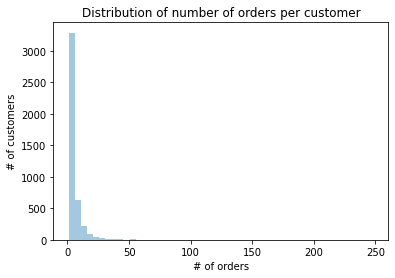

In [ ]:
import seaborn as sns
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

As the first step, we keep only the relevant columns and drop duplicated values — one order (indicated by InvoiceNo) can contain multiple items (indicated by StockCode).

In [ ]:
df = df[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()
df

,CustomerID,InvoiceNo,InvoiceDate
0,17850,536365,2010-12-01 08:26:00
7,17850,536366,2010-12-01 08:28:00
9,13047,536367,2010-12-01 08:34:00
21,13047,536368,2010-12-01 08:34:00
25,13047,536369,2010-12-01 08:35:00
...,...,...,...
541865,13777,581583,2011-12-09 12:23:00
541867,13777,581584,2011-12-09 12:25:00
541869,15804,581585,2011-12-09 12:31:00
541890,13113,581586,2011-12-09 12:49:00


In [ ]:

df['order_month'] = df['InvoiceDate'].dt.to_period('M')
df

,CustomerID,InvoiceNo,InvoiceDate,order_month
0,17850,536365,2010-12-01 08:26:00,2010-12
7,17850,536366,2010-12-01 08:28:00,2010-12
9,13047,536367,2010-12-01 08:34:00,2010-12
21,13047,536368,2010-12-01 08:34:00,2010-12
25,13047,536369,2010-12-01 08:35:00,2010-12
...,...,...,...,...
541865,13777,581583,2011-12-09 12:23:00,2011-12
541867,13777,581584,2011-12-09 12:25:00,2011-12
541869,15804,581585,2011-12-09 12:31:00,2011-12
541890,13113,581586,2011-12-09 12:49:00,2011-12


As the second step, we create the cohort and order_month variables. The first one indicates the monthly cohort based on the first purchase date (calculated per customer). The latter one is the truncated month of the purchase date.

In [ ]:
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 
df.tail(50)

,CustomerID,InvoiceNo,InvoiceDate,order_month,cohort
540177,14702,581471,2011-12-08 19:29:00,2011-12,2010-12
540204,15796,581472,2011-12-08 19:55:00,2011-12,2011-02
540221,12748,581473,2011-12-08 19:57:00,2011-12,2010-12
540253,12748,581474,2011-12-08 20:01:00,2011-12,2010-12
540277,13069,581475,2011-12-09 08:39:00,2011-12,2010-12
540296,12433,581476,2011-12-09 08:48:00,2011-12,2010-12
540361,13426,581477,2011-12-09 08:59:00,2011-12,2010-12
540371,17364,581478,2011-12-09 08:59:00,2011-12,2011-01
540389,17364,581479,2011-12-09 09:00:00,2011-12,2011-01
540390,14441,581480,2011-12-09 09:07:00,2011-12,2010-12


Then, we aggregate the data per cohort and order_month and count the number of unique customers in each group. Additionally, we add the period_number, which indicates the number of periods between the cohort month and the month of the purchase.

In [ ]:
from operator import attrgetter
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

   

The next step is to pivot the df_cohort table in a way that each row contains information about a given cohort and each column contains values for a certain period.

In [ ]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To obtain the retention matrix, we need to divide the values each row by the row's first value, which is actually the cohort size — all customers who made their first purchase in the given month.

In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lastly, we plot the retention matrix as a heatmap. Additionally, we wanted to include extra information regarding the cohort size. That is why we in fact created two heatmaps, where the one indicating the cohort size is using a white only colormap.

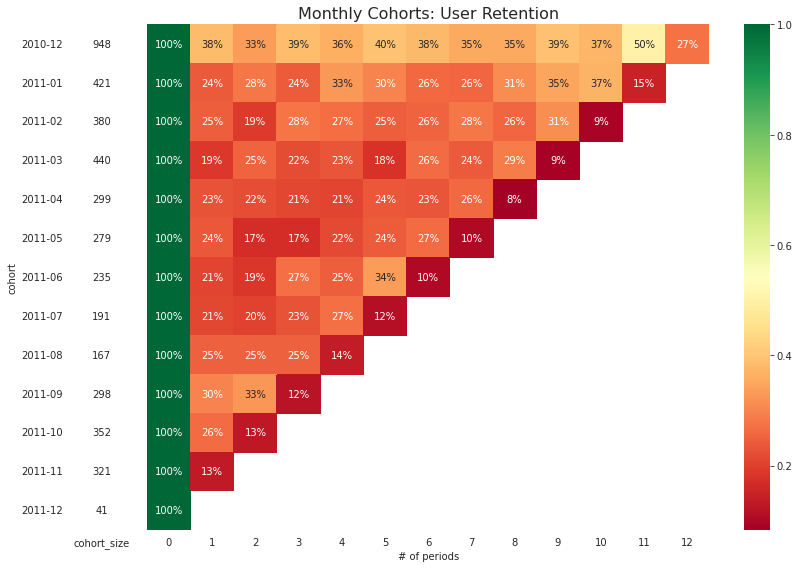

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In the image, we can see that there is a sharp drop-off in the second month (indexed as 1) already, on average around 80% of customers do not make any purchase in the second month. The first cohort (2010–12) seems to be an exception and performs surprisingly well as compared to the other ones. A year after the first purchase, there is a 50% retention. This might be a cohort of dedicated customers, who first joined the platform based on some already-existing connections with the retailer. However, from data alone, that is very hard to accurately explain.

Throughout the matrix, we can see fluctuations in retention over time. This might be caused by the characteristics of the business, where clients do periodic purchases, followed by periods of inactivity.